Chain([4B:3/8♩, 5A♯:3/8♩, 6D:3/4♩, 5G♯:3/16♩, 5A:3/16♩, 5B:3/16♩, 6C♯:3/16♩, 5A♯:3/16♩, 6C:3/16♩, 6D:3/16♩, …])
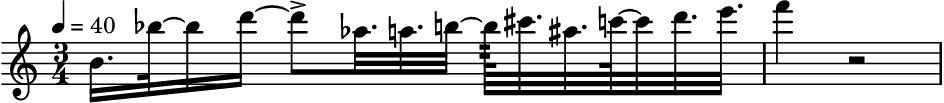

In [1]:
from maelzel.core import *
from maelzel.core import symbols

w = getWorkspace()
w.config['quant.complexity'] = 'highest'
w.scorestruct = "3/4, q=40"

chain = Chain([
    Note("4B", F(1, 4)+F(1, 8)),
    Note("5Bb", F(1, 4)+F(1, 8)),
    Note("6D", F(3, 4)),
    
    Note("5G#", F(1, 4)*F(3, 4)),
    Note("5A", F(1, 4)*F(3, 4)),
    Note("5B", F(1, 4)*F(3, 4)),
    
    Note("6C#", F(1, 4)*F(3, 4)),
    Note("5Bb", F(1, 4)*F(3, 4)),
    Note("6C", F(1, 4)*F(3, 4)),
    Note("6D", F(1, 4)*F(3, 4)),
    Note("6E", F(1, 4)*F(3, 4)),

    Note("6F", 1)
    
]).setPlay(instr='.piano')

# chain.addBreak(1)
chain.addSymbolAt(symbols.Articulation("accent"), 1)
chain.addSymbolAt('tremolo', 2)
# chain.eventAt(2+F(1, 7), split=False).addSymbol('tremolo')


chain


In [2]:
from maelzel.core import *
from maelzel.core import symbols

w = getWorkspace()
w.config['quant.complexity'] = 'highest'
w.config['.quant.debug'] = True
w.scorestruct = "3/4, q=52"

chain = Chain([
    Note("4B", F(1, 2)),
    Note("5Bb", F(1, 4)),
    Note("6D", F(1, 4)),
    
    Note("5G#", F(1, 3)),
    Note("5A", F(3, 6)),
    Note("5B", F(1, 6)),
    
    Note("6C#", F(1, 4)*F(3, 4)),
    Note("5Bb", F(1, 4)*F(3, 4)),
    Note("6C", F(1, 4)*F(3, 4)),
    Note("6D", F(1, 4)*F(3, 4)),
    Note("6E", F(1, 4)*F(3, 4)),

    Note("6F", 1)
    
]).setPlay(instr='.piano')

# chain.addBreak(1)
chain.addSymbolAt(symbols.Articulation("accent"), 1)
chain.addSymbolAt('tremolo', 2)
# chain.eventAt(2+F(1, 7), split=False).addSymbol('tremolo')
# chain


Possible divisions: 2661, solutions: 3, best result: div: (4,), error: 0.00000
Beat: 0 - 1 (dur: 1)


error,div,snapped,slots,info
0.0000,"(4,)","[SnappedNotation(notation=‹4B:1/2♩›, offset=0, duration=1/2), SnappedNotation(notation=‹5A#:1/4♩ 0.5:0.75›, offset=1/2, duration=1/4), SnappedNotation(notation=‹6D:1/4♩ 0.75:1›, offset=3/4, duration=1/4)]","[0, 2, 3]","gridError=0, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.01 (0, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.3638,"(7,)","[SnappedNotation(notation=‹4B:1/2♩›, offset=0, duration=4/7), SnappedNotation(notation=‹5A#:1/4♩ 0.5:0.75›, offset=4/7, duration=1/7), SnappedNotation(notation=‹6D:1/4♩ 0.75:1›, offset=5/7, duration=2/7)]","[0, 4, 5]","gridError=0.257, rhythmComplexity=0.149 (numSyncop=1, numTies=0), divPenalty=0.01 (0, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.4169,"(5,)","[SnappedNotation(notation=‹4B:1/2♩›, offset=0, duration=3/5), SnappedNotation(notation=‹5A#:1/4♩ 0.5:0.75›, offset=3/5, duration=1/5), SnappedNotation(notation=‹6D:1/4♩ 0.75:1›, offset=4/5, duration=1/5)]","[0, 3, 4]","gridError=0.295, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.01 (0, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Possible divisions: 2661, solutions: 14, best result: div: (6,), error: 0.00000
Beat: 1 - 2 (dur: 1)


error,div,snapped,slots,info
0.0000,"(6,)","[SnappedNotation(notation=‹5G#:1/3♩ attachments=[Articulation(kind=accent)]›, offset=0, duration=1/3), SnappedNotation(notation=‹5A:1/2♩ 0.333:0.833›, offset=1/3, duration=1/2), SnappedNotation(notation=‹5B:1/6♩ 0.833:1›, offset=5/6, duration=1/6)]","[0, 2, 5]","gridError=0, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.01 (0, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0009,"(3, 3)","[SnappedNotation(notation=‹5G#:1/3♩ attachments=[Articulation(kind=accent)]›, offset=0, duration=1/3), SnappedNotation(notation=‹5A:1/2♩ 0.333:0.833›, offset=1/3, duration=1/2), SnappedNotation(notation=‹5B:1/6♩ 0.833:1›, offset=5/6, duration=1/6)]","[0, 2, 5]","gridError=0, rhythmComplexity=0.149 (numSyncop=1, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0009,"(1, 1, 2)","[SnappedNotation(notation=‹5G#:1/3♩ attachments=[Articulation(kind=accent)]›, offset=0, duration=1/3), SnappedNotation(notation=‹5A:1/2♩ 0.333:0.833›, offset=1/3, duration=1/2), SnappedNotation(notation=‹5B:1/6♩ 0.833:1›, offset=5/6, duration=1/6)]","[0, 1, 3]","gridError=0, rhythmComplexity=0.149 (numSyncop=1, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1161,"(3, 8)","[SnappedNotation(notation=‹5G#:1/3♩ attachments=[Articulation(kind=accent)]›, offset=0, duration=1/3), SnappedNotation(notation=‹5A:1/2♩ 0.333:0.833›, offset=1/3, duration=23/48), SnappedNotation(notation=‹5B:1/6♩ 0.833:1›, offset=13/16, duration=3/16)]","[0, 2, 8]","gridError=0.0817, rhythmComplexity=0.333 (numSyncop=1, numTies=1), divPenalty=0.01 (0, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1172,"(8, 3)","[SnappedNotation(notation=‹5G#:1/3♩ attachments=[Articulation(kind=accent)]›, offset=0, duration=5/16), SnappedNotation(notation=‹5A:1/2♩ 0.333:0.833›, offset=5/16, duration=25/48), SnappedNotation(notation=‹5B:1/6♩ 0.833:1›, offset=5/6, duration=1/6)]","[0, 5, 10]","gridError=0.0817, rhythmComplexity=0.615 (numSyncop=1, numTies=2), divPenalty=0.01 (0, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1274,"(3, 7)","[SnappedNotation(notation=‹5G#:1/3♩ attachments=[Articulation(kind=accent)]›, offset=0, duration=1/3), SnappedNotation(notation=‹5A:1/2♩ 0.333:0.833›, offset=1/3, duration=11/21), SnappedNotation(notation=‹5B:1/6♩ 0.833:1›, offset=6/7, duration=1/7)]","[0, 2, 8]","gridError=0.0898, rhythmComplexity=0.333 (numSyncop=1, numTies=1), divPenalty=0.01 (0, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1284,"(7, 3)","[SnappedNotation(notation=‹5G#:1/3♩ attachments=[Articulation(kind=accent)]›, offset=0, duration=5/14), SnappedNotation(notation=‹5A:1/2♩ 0.333:0.833›, offset=5/14, duration=10/21), SnappedNotation(notation=‹5B:1/6♩ 0.833:1›, offset=5/6, duration=1/6)]","[0, 5, 9]","gridError=0.0898, rhythmComplexity=0.615 (numSyncop=1, numTies=2), divPenalty=0.01 (0, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1607,"(3, 5)","[SnappedNotation(notation=‹5G#:1/3♩ attachments=[Articulation(kind=accent)]›, offset=0, duration=1/3), SnappedNotation(notation=‹5A:1/2♩ 0.333:0.833›, offset=1/3, duration=7/15), SnappedNotation(notation=‹5B:1/6♩ 0.833:1›, offset=4/5, duration=1/5)]","[0, 2, 6]","gridError=0.114, rhythmComplexity=0.149 (numSyncop=1, numTies=0), divPenalty=0.01 (0, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1607,"(5, 3)","[SnappedNotation(notation=‹5G#:1/3♩ attachments=[Articulation(kind=accent)]›, offset=0, duration=3/10), SnappedNotation(notation=‹5A:1/2♩ 0.333:0.833›, offset=3/10, duration=8/15), SnappedNotation(notation=‹5B:1/6♩ 0.833:1›, offset=5/6, duration=1/6)]","[0, 3, 7]","gridError=0.114, rhythmComplexity=0.149 (numSyncop=1, numTies=0), divPenalty=0.01 (0, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, leve

Possible divisions: 2661, solutions: 4, best result: div: (8, 8), error: 0.00047
Beat: 2 - 3 (dur: 1)


error,div,snapped,slots,info
0.0005,"(8, 8)","[SnappedNotation(notation=‹6C#:3/16♩ attachments=[Tremolo(nummarks=2, tremtype=single)]›, offset=0, duration=3/16), SnappedNotation(notation=‹5A#:3/16♩ 0.188:0.375›, offset=3/16, duration=3/16), SnappedNotation(notation=‹6C:3/16♩ 0.375:0.562›, offset=3/8, duration=3/16), SnappedNotation(notation=‹6D:3/16♩ 0.562:0.75›, offset=9/16, duration=3/16), SnappedNotation(notation=‹6E:3/16♩ 0.75:0.938›, offset=3/4, duration=3/16), SnappedNotation(notation=‹6F~:1/16♩ 0.938:1›, offset=15/16, duration=1/16)]","[0, 3, 6, 9, 12, 15]","gridError=0, rhythmComplexity=0.0745 (numSyncop=1, numTies=0), divPenalty=0.0141 (0, divPenalty=0.0141, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1581,"(5, 8)","[SnappedNotation(notation=‹6C#:3/16♩ attachments=[Tremolo(nummarks=2, tremtype=single)]›, offset=0, duration=1/5), SnappedNotation(notation=‹5A#:3/16♩ 0.188:0.375›, offset=1/5, duration=1/5), SnappedNotation(notation=‹6C:3/16♩ 0.375:0.562›, offset=2/5, duration=13/80), SnappedNotation(notation=‹6D:3/16♩ 0.562:0.75›, offset=9/16, duration=3/16), SnappedNotation(notation=‹6E:3/16♩ 0.75:0.938›, offset=3/4, duration=3/16), SnappedNotation(notation=‹6F~:1/16♩ 0.938:1›, offset=15/16, duration=1/16)]","[0, 2, 4, 6, 9, 12]","gridError=0.112, rhythmComplexity=0.167 (numSyncop=1, numTies=1), divPenalty=0.0141 (0, divPenalty=0.0141, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2601,"(11,)","[SnappedNotation(notation=‹6C#:3/16♩ attachments=[Tremolo(nummarks=2, tremtype=single)]›, offset=0, duration=2/11), SnappedNotation(notation=‹5A#:3/16♩ 0.188:0.375›, offset=2/11, duration=2/11), SnappedNotation(notation=‹6C:3/16♩ 0.375:0.562›, offset=4/11, duration=2/11), SnappedNotation(notation=‹6D:3/16♩ 0.562:0.75›, offset=6/11, duration=2/11), SnappedNotation(notation=‹6E:3/16♩ 0.75:0.938›, offset=8/11, duration=2/11), SnappedNotation(notation=‹6F~:1/16♩ 0.938:1›, offset=10/11, duration=1/11)]","[0, 2, 4, 6, 8, 10]","gridError=0.184, rhythmComplexity=0.298 (numSyncop=4, numTies=0), divPenalty=0.1 (0, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.3952,"(5,)","[SnappedNotation(notation=‹6C#:3/16♩ attachments=[Tremolo(nummarks=2, tremtype=single)]›, offset=0, duration=1/5), SnappedNotation(notation=‹5A#:3/16♩ 0.188:0.375›, offset=1/5, duration=1/5), SnappedNotation(notation=‹6C:3/16♩ 0.375:0.562›, offset=2/5, duration=1/5), SnappedNotation(notation=‹6D:3/16♩ 0.562:0.75›, offset=3/5, duration=1/5), SnappedNotation(notation=‹6E:3/16♩ 0.75:0.938›, offset=4/5, duration=1/5), SnappedNotation(notation=‹6F~:1/16♩ 0.938:1›, offset=1, duration=0)]","[0, 1, 2, 3, 4, 5]","gridError=0.279, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.01 (0, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Possible divisions: 2661, solutions: 6, best result: div: (1, 8), error: 0.00316
Beat: 0 - 1 (dur: 1)


error,div,snapped,slots,info
0.0032,"(1, 8)","[SnappedNotation(notation=‹~6F:15/16♩›, offset=0, duration=15/16), SnappedNotation(notation=‹r:1/16♩ 0.938:1›, offset=15/16, duration=1/16)]","[0, 8]","gridError=0, rhythmComplexity=0.5 (numSyncop=1, numTies=1), divPenalty=0.01 (0, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0032,"(1, 1, 1, 4)","[SnappedNotation(notation=‹~6F:15/16♩›, offset=0, duration=15/16), SnappedNotation(notation=‹r:1/16♩ 0.938:1›, offset=15/16, duration=1/16)]","[0, 6]","gridError=0, rhythmComplexity=0.5 (numSyncop=1, numTies=1), divPenalty=0.02 (0, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0032,"(1, 1, 1, 1, 1, 8)","[SnappedNotation(notation=‹~6F:15/16♩›, offset=0, duration=15/16), SnappedNotation(notation=‹r:1/16♩ 0.938:1›, offset=15/16, duration=1/16)]","[0, 10]","gridError=0, rhythmComplexity=0.5 (numSyncop=1, numTies=1), divPenalty=0.02 (0, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0552,"(1, 7)","[SnappedNotation(notation=‹~6F:15/16♩›, offset=0, duration=13/14), SnappedNotation(notation=‹r:1/16♩ 0.938:1›, offset=13/14, duration=1/14)]","[0, 7]","gridError=0.0374, rhythmComplexity=0.5 (numSyncop=1, numTies=1), divPenalty=0.01 (0, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1156,"(7,)","[SnappedNotation(notation=‹~6F:15/16♩›, offset=0, duration=1)]","[0, 7]","gridError=0.0817, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.01 (0, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1190,"(5,)","[SnappedNotation(notation=‹~6F:15/16♩›, offset=0, duration=1)]","[0, 5]","gridError=0.0817, rhythmComplexity=0.894 (numSyncop=0, numTies=1), divPenalty=0.01 (0, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Chain([4B:1/2♩, 5A♯:1/4♩, 6D:1/4♩, 5G♯:1/3♩:symbols=[Articulation(accent)], 5A:1/2♩, 5B:1/6♩, 6C♯:3/16♩:symbols=[Tremolo(nummarks=2, tremtype=single)], 5A♯:3/16♩, 6C:3/16♩, 6D:3/16♩, …])
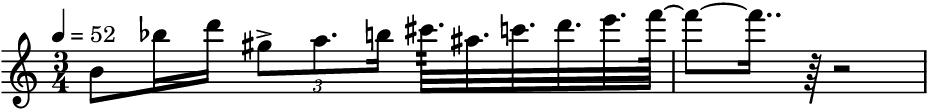

In [3]:
chain

Chain([4B:1/2♩, 5A♯:1/4♩, 6D:1/4♩, 5G♯:1/3♩:symbols=[Articulation(accent)], 5A:1/2♩, 5B:1/6♩, 6C♯:3/16♩:symbols=[Tremolo(nummarks=2, tremtype=single)], 5A♯:3/16♩, 6C:3/16♩, 6D:3/16♩, …])
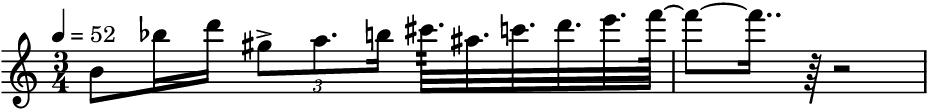

In [4]:
chain2 = chain.copy()
chain2

In [10]:
chain2.stack()
all(ev.offset is not None for ev in chain2.items)

True

Evaluating 2764 divisions
Beat: 1 - 2 (dur: 1)


error,div,snapped,slots,info
0.0014,"(1, 3)","[SnappedNotation(notation=‹r:5/6♩›, offset=0, duration=5/6), SnappedNotation(notation=‹5B:1/6♩ 0.833:1›, offset=5/6, duration=1/6)]","[0, 3]","gridError=0, rhythmComplexity=0.224 (numSyncop=1, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0014,"(1, 1, 2)","[SnappedNotation(notation=‹r:5/6♩›, offset=0, duration=5/6), SnappedNotation(notation=‹5B:1/6♩ 0.833:1›, offset=5/6, duration=1/6)]","[0, 3]","gridError=0, rhythmComplexity=0.224 (numSyncop=1, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0014,"(1, 1, 1, 3)","[SnappedNotation(notation=‹r:5/6♩›, offset=0, duration=5/6), SnappedNotation(notation=‹5B:1/6♩ 0.833:1›, offset=5/6, duration=1/6)]","[0, 4]","gridError=0, rhythmComplexity=0.224 (numSyncop=1, numTies=0), divPenalty=0.01 (0, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0014,"(1, 1, 1, 1, 6)","[SnappedNotation(notation=‹r:5/6♩›, offset=0, duration=5/6), SnappedNotation(notation=‹5B:1/6♩ 0.833:1›, offset=5/6, duration=1/6)]","[0, 5]","gridError=0, rhythmComplexity=0.224 (numSyncop=1, numTies=0), divPenalty=0.02 (0, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0028,"(6,)","[SnappedNotation(notation=‹r:5/6♩›, offset=0, duration=5/6), SnappedNotation(notation=‹5B:1/6♩ 0.833:1›, offset=5/6, duration=1/6)]","[0, 5]","gridError=0, rhythmComplexity=0.447 (numSyncop=0, numTies=1), divPenalty=0.01 (0, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1606,"(5,)","[SnappedNotation(notation=‹r:5/6♩›, offset=0, duration=4/5), SnappedNotation(notation=‹5B:1/6♩ 0.833:1›, offset=4/5, duration=1/5)]","[0, 4]","gridError=0.114, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.01 (0, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


5B:1/6♩:offset=1.833
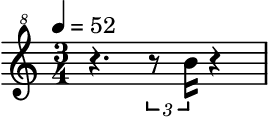

In [11]:
ev = next(ev for ev in chain2.recurse(reverse=True) if ev.relOffset() < 2)
ev

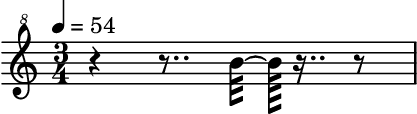

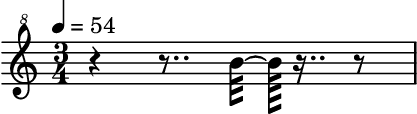

In [10]:
ev.show()
chain[5].show()

5B:3/16♩:offset=1.875
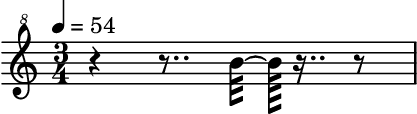

In [7]:
ev2 = next(ev for ev, offset in chain2.eventsWithOffset(end=2, reverse=True) if offset < 2)
ev2

In [8]:
ev2 is ev

True

In [6]:
# chain2.eventAt(2.5).addSymbol(symbols.Breath(visible=True, horizontalPlacement='post'))
chain2.splitAt(2)
chain2.eventAt(1, split=True).addSpanner('beam', chain2.eventBefore(2))
chain2

ValueError: Invalid offset: 2

[maelzel.scoring:notation.py:473:addAttachment:DEBUG] An attachment of class <class 'maelzel.scoring.attachment.Breath'> already present in this notation, replacing the old one by the new one (Breath(horizontalPlacement=post, placement=above))
[maelzel.scoring:clefutils.py:311:findBestClefs:DEBUG] No pitched notations given
[maelzel.scoring:renderlily.py:1219:write:DEBUG] Rendering lilypond '/home/em/.cache/tmp_nfvq6cj/7vjljfne.ly' to '/home/em/.cache/tmp_nfvq6cj/7vjljfne.png'
[maelzel.scoring:renderlily.py:1232:write:DEBUG] Found crop file '/home/em/.cache/tmp_nfvq6cj/7vjljfne.cropped.png', using that as output
[maelzel.scoring:renderlily.py:1245:write:DEBUG] Moving /home/em/.cache/tmp_nfvq6cj/7vjljfne.cropped.png to /home/em/.cache/tmp_nfvq6cj/z_drp26i.png


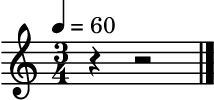

In [20]:
from maelzel.core import *
from maelzel.core import symbols
from maelzel import scoring
scoring.logger.setLevel("DEBUG")

n = Note(0, 1)
n.addSymbol(symbols.Breath(visible=False, horizontalPlacement='post'))
n.show()

In [21]:
from maelzel.core import *
n = Note(0, 1)
print(n.scoringEvents())
n.quantizedScore().dump(tree=True)

[‹r 0:1 1♩›]
Part #0:
  Measure #0
    Timesig: 3/4(quarter=60)
    Node ratio: 1/1, offset=0, end=3, dur=3, symbolicdur=3
      «r 0:1 1♩ attachments=[Breath(horizontalPlacement=post, placement=above)]»
      «r 1:3 2♩»


[maelzel.scoring:clefutils.py:311:findBestClefs:DEBUG] No pitched notations given
[maelzel.scoring:renderlily.py:1219:write:DEBUG] Rendering lilypond '/home/em/.cache/tmp_nfvq6cj/izizt215.ly' to '/home/em/.cache/tmp_nfvq6cj/izizt215.png'
[maelzel.scoring:renderlily.py:1232:write:DEBUG] Found crop file '/home/em/.cache/tmp_nfvq6cj/izizt215.cropped.png', using that as output
[maelzel.scoring:renderlily.py:1245:write:DEBUG] Moving /home/em/.cache/tmp_nfvq6cj/izizt215.cropped.png to /home/em/.cache/tmp_nfvq6cj/yd2zk3nq.png


R:1♩
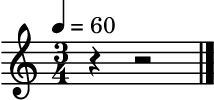

In [22]:
from maelzel.core import *
n = Note(0, 1)
# n.addSymbol(symbols.NoMerge(next=True))
n

[maelzel.scoring:clefutils.py:311:findBestClefs:DEBUG] No pitched notations given
[maelzel.scoring:renderlily.py:1219:write:DEBUG] Rendering lilypond '/home/em/.cache/tmp_nfvq6cj/es_s5fhe.ly' to '/home/em/.cache/tmp_nfvq6cj/es_s5fhe.png'
[maelzel.scoring:renderlily.py:1232:write:DEBUG] Found crop file '/home/em/.cache/tmp_nfvq6cj/es_s5fhe.cropped.png', using that as output
[maelzel.scoring:renderlily.py:1245:write:DEBUG] Moving /home/em/.cache/tmp_nfvq6cj/es_s5fhe.cropped.png to /home/em/.cache/tmp_nfvq6cj/1hbi0n5c.png


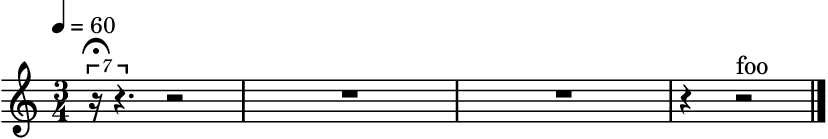

In [23]:
from maelzel.core import *

ch = Chain([Rest(1/7).addSymbol(symbols.Fermata(mergenext=False)), Rest(0.5, offset=10, label='foo')])
# ch.show()
ch.show()